# Introduction

This script is intended to download MERCATOR data via OpenDAP

In [1]:
#Import packages
import netCDF4
from netCDF4 import Dataset,num2date 
import numpy as np
import xarray as xr
import datetime
import pandas as pd
import matplotlib.pyplot as plt

import requests as rq

import pydap #To install pydap I had to use $ conda install -c conda-forge pydap
import pydap.client

import getpass

import os

import time

# Set the extent

In [3]:

#Temporal extent of 10 years

ldate = pd.date_range(start="19961229",end="19971229",freq="D") 


# Download MERCATOR netcdfs

You must first set up an account and request access to an ocean product with MERCATOR in order to receive authorisation as well as a USERNAME and PASSWORD

Following guide at https://tds.mercator-ocean.fr/userguide/user_guide.html

A key instruction in this guide is "If you encounter timeout problems, please try to split your data retrieval requests over time"

To avoid timeouts I download each variable spereately (e.g. U,V,W) as well as splitting them into multiple .nc files across time and depth.




-You have to select a dataset and get the opendap adress which look like : '''http://tds.mercator-ocean.fr/thredds/dodsC/psy4v3r1-hourly-gridT'''
-Copy the address from the page that contains:

"Access: 1. OPENDAP:" (e.g. '/thredds/dodsC/glorys12v1-free-daily-gridW')



## Download 'static files' 

For information on these static files visit https://www.mercator-ocean.eu/static-files-description/

In [5]:
session = rq.Session()
session.auth = ("INSERT_USERNAME","INSERT_PASSWORD")

#Location of mask static file netcdf        
url = 'http://tds.mercator-ocean.fr/thredds/dodsC/psy4v3r1/global-analysis-forecast-phy-001-024-pgnstatics/PSY4V3R1_mask.nc'
store = xr.backends.PydapDataStore.open(url,session = session)
mask = xr.open_dataset(store)

#Location of mesh_hgr static file netcdf        
url = 'http://tds.mercator-ocean.fr/thredds/dodsC/psy4v3r1/global-analysis-forecast-phy-001-024-pgnstatics/PSY4V3R1_mesh_hgr.nc'
store = xr.backends.PydapDataStore.open(url,session = session)
mesh_hgr = xr.open_dataset(store)

#Location of mesh_zgr static file netcdf        
url = 'http://tds.mercator-ocean.fr/thredds/dodsC/psy4v3r1/global-analysis-forecast-phy-001-024-pgnstatics/PSY4V3R1_mesh_zgr.nc'
store = xr.backends.PydapDataStore.open(url,session = session)
mesh_zgr = xr.open_dataset(store)




### Mask

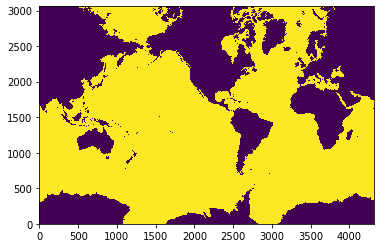

In [6]:
plt.pcolor(mask.tmask[0,0,:,:] )

Based on the **above global landmask** selext the x and y to slice the data by (set the extent). The MERCATOR guide recommends slicing by a defined lat. and lon. but I have found that this slices the velocity (U,V,W) at different indexes resulting in a combination that confuses PARCELS.

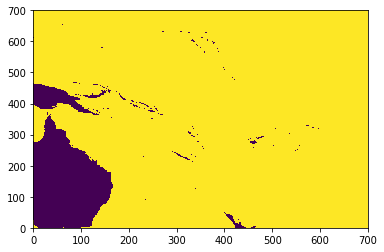

In [7]:
cwp_mask = mask.isel({'x':slice(800,1500),'y':slice(1000,1700)})
plt.pcolor(cwp_mask.tmask[0,0,:,:] )

### Download Static Files

In [8]:

cwp_mask = mask.isel({'x':slice(800,1500),'y':slice(1000,1700)})

path  = "../MERCATOR_cwp/glorys12v1_p_mask.nc"

if os.path.exists(path):
    print("File exists. Skipping.")
else:
    cwp_mask.to_netcdf(path)


File exists. Skipping.


### Mesh

In [9]:

cwp_hgr = mesh_hgr.isel({'x':slice(800,1500),'y':slice(1000,1700)})

path  = "../MERCATOR_cwp/glorys12v1_p_hgr.nc"

if os.path.exists(path):
    print("File exists. Skipping.")
else:
    cwp_hgr.to_netcdf(path)

File exists. Skipping.


In [10]:


cwp_zgr = mesh_zgr.isel({'x':slice(800,1500),'y':slice(1000,1700)})

path  = "../MERCATOR_cwp/glorys12v1_p_zgr.nc"

if os.path.exists(path):
    print("File exists. Skipping.")
else:
    cwp_zgr.to_netcdf(path)

File exists. Skipping.


## Download Variable files (velocities)

In [11]:

#Access all Temperature data from 'glorys12v1-daily'
session = rq.Session()
session.auth = ("INSERT_USERNAME","INSERT_PASSWORD")
url = 'https://tds.mercator-ocean.fr/thredds/dodsC/glorys12v1-daily-gridT'
store = xr.backends.PydapDataStore.open(url,session = session)
data_T = xr.open_dataset(store)
data_T

<xarray.Dataset>
Dimensions:       (y: 3059, x: 4322, deptht: 50, time_counter: 10015)
Coordinates:
    nav_lon       (y, x) float32 ...
  * deptht        (deptht) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * x             (x) int32 1 2 3 4 5 6 7 ... 4316 4317 4318 4319 4320 4321 4322
  * y             (y) int32 1 2 3 4 5 6 7 ... 3053 3054 3055 3056 3057 3058 3059
    nav_lat       (y, x) float32 ...
  * time_counter  (time_counter) datetime64[ns] 1992-12-30T12:00:00 ... 2020-...
Data variables:
    votemper      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    file_name:    GLORYS12V1_y2020m05d30_gridT.nc
    institution:  MERCATOR OCEAN
    source:       NEMO
    TimeStamp:    2021-SEP-02 22:09:45 GMT-0000
    references:   http://www.mercator-ocean.eu

In [ ]:
#Access all W-velocity data from 'glorys12v1-daily'
session = rq.Session()
session.auth = ("INSERT_USERNAME","INSERT_PASSWORD")
url = 'https://tds.mercator-ocean.fr/thredds/dodsC/glorys12v1-daily-gridW'
store = xr.backends.PydapDataStore.open(url,session = session)
data_W = xr.open_dataset(store)

In [1]:
#Access all U-velocity data from 'glorys12v1-daily'


url = 'https://tds.mercator-ocean.fr/thredds/dodsC/glorys12v1-daily-gridU'
store = xr.backends.PydapDataStore.open(url,session = session)
data_U = xr.open_dataset(store)

NameError: name 'xr' is not defined

In [ ]:
#Access all V-velocity data from 'glorys12v1-daily'


url = 'https://tds.mercator-ocean.fr/thredds/dodsC/glorys12v1-daily-gridV'
store = xr.backends.PydapDataStore.open(url,session = session)
data_V = xr.open_dataset(store)

## Subset the data 
 
by the extent set at the beginning

Here is where the temporal and geographcal extent, defined above, are used to slice the datasets

In [ ]:
cwp_T = data_T.isel({'x':slice(750,1500),'y':slice(1000,1750)}).sel({'time_counter':ldate},method="nearest")


In [ ]:
cwp_W = data_W.isel({'x':slice(750,1500),'y':slice(1000,1750)}).sel({'time_counter':ldate},method="nearest")


In [ ]:
cwp_U = data_U.isel({'x':slice(750,1500),'y':slice(1000,1750)}).sel({'time_counter':ldate},method="nearest")


In [ ]:
cwp_V = data_V.isel({'x':slice(750,1500),'y':slice(1000,1750)}).sel({'time_counter':ldate},method="nearest")


In [ ]:
cwp_V

## Download iteratively for each day timestep

The '.groupby' function allows you to select each timestep in the dataset and download them seperately. This is a commonly used format for implimentig PARCELS. However, this often resulted in a timeout.

In [ ]:
#Subset the dataset by timestep
days, datasets = zip(*cwp_T.groupby("time_counter"))

#write a list of file names based on the timestep
paths = [f"data/OGCM_MERCATOR//glorys12v1_cwp_{y}_T.nc" for y in days]
        

In [ ]:
#Save without overwrite

for i in len(paths):
    time.sleep(10)
    if os.path.exists(paths[i]):
        print("File exists. Skipping.")
    else:
    cwp_W.to_netcdf(dataset[i],paths[i])

### W

In [ ]:
#Subset the dataset by timestep
days, datasets = zip(*cwp_W.groupby("time_counter"))

#write a list of file names based on the timestep
paths = [f"data/OGCM_MERCATOR//glorys12v1_cwp_{y}_W.nc" for y in days]

        

In [ ]:
#Save without overwrite

for i in len(paths):
    time.sleep(10)
    if os.path.exists(paths[i]):
        print("File exists. Skipping.")
    else:
    nwp_W.to_netcdf(dataset[i],paths[i])

### U

In [ ]:
#Subset the dataset by timestep
days, datasets = zip(*cwp_U.groupby("time_counter"))

#write a list of file names based on the timestep
paths = [f"data/OGCM_MERCATOR//glorys12v1_cwp_{y}_U.nc" for y in days]

        

In [ ]:
#Save without overwrite

for i in len(paths):
    if os.path.exists(paths[i]):
        print("File exists. Skipping.")
    else:
    nwp_W.to_netcdf(dataset[i],paths[i])

### V

In [ ]:
#Subset the dataset by timestep
days, datasets = zip(*cwp_V.groupby("time_counter"))

#write a list of file names based on the timestep
paths = [f"data/OGCM_MERCATOR//glorys12v1_cwp_{y}_W.nc" for y in days]

        

In [ ]:
#Save without overwrite

for i in len(paths):
    if os.path.exists(paths[i]):
        print("File exists. Skipping.")
    else:
    nwp_W.to_netcdf(dataset[i],paths[i])